In [2]:
'''
this is my testing playground
please read only if you're not me - Flo :)
'''

#################################
# Set Up
#################################

import spaudiopy as spa
import pyfar as pf
import matplotlib.pyplot as plt
import scipy as sp
import os
import pathlib
import glob
import numpy as np


In [3]:
# set up paths

in_dir = "../../Raw Data/Applied Acoustics/Applied Acoustics/"
folders = os.listdir(in_dir)

# select target folder
folder = folders[2]

# resulting path
folder_path = in_dir + folder + "/"

print(len(folders), "folders found")
print(folders)
print(folder, "as selected folder")

19 folders found
['A10p', 'A11p', 'A20p', 'A21p', 'A30p', 'A31p', 'B10p', 'B11p', 'B20p', 'B21p', 'B30p', 'B31p', 'C10p', 'C11p', 'C20p', 'C21p', 'C30p', 'C31p', 'ORG']
A20p as selected folder


loaded audio file


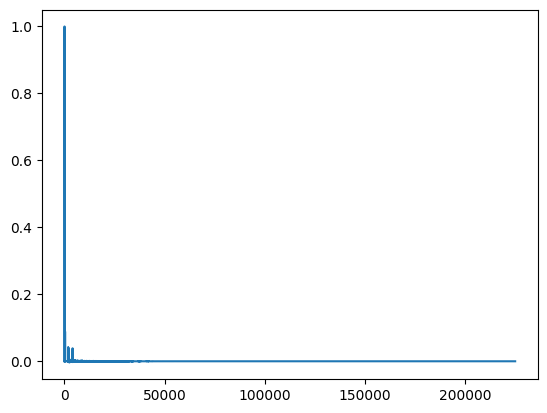

In [4]:
# load RIR audio

path_in = glob.glob(folder_path + "RIR/*.wav")
RIR = spa.io.load_audio(path_in)

print("loaded audio file")
print(RIR)


plt.plot(RIR)

16 HOA files found. = 3rd order ambisonics


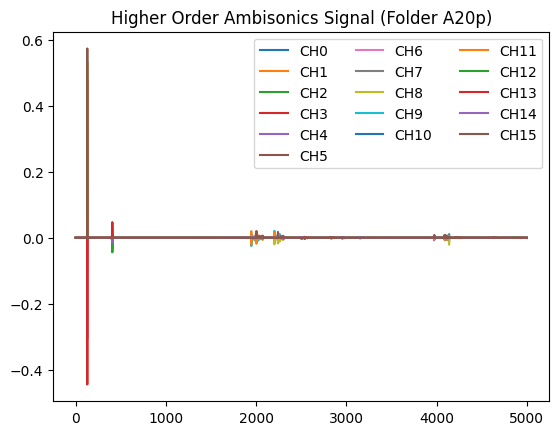

In [5]:
# load HOA (Higher order ambisonics)

HOA_paths = glob.glob(folder_path + "HOA\*.wav")
print(len(HOA_paths), "HOA files found. = 3rd order ambisonics")

HOAS = spa.io.load_audio(HOA_paths)
print(HOAS)

for idx, signal in enumerate(HOAS):
    plt.plot(signal[0:5000], label=f"CH{idx}")

plt.legend(ncols=3)
plt.title(f"Higher Order Ambisonics Signal (Folder {folder})")
plt.show()
print(type(HOAS))

In [ ]:
multi = spa.io.load_audio

In [7]:
#AmbiB = spa.sig.AmbiBSignal.sh_to_b(HOAS) funzt nicht

spa.decoder.LoudspeakerSetup.

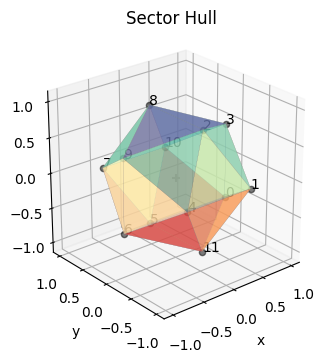

In [ ]:
# steering of sectors
N_sph_sec = 2
sec_vecs = spa.grids.load_t_design(2*N_sph_sec if True else N_sph_sec+1)  # N+1 or 2N
sec_azi, sec_zen, _ = spa.utils.cart2sph(*sec_vecs.T)
# number of sectors
J_sec = len(sec_vecs)
spa.plot.hull(spa.decoder.get_hull(*sec_vecs.T), title="Sector Hull")
plt.gcf().set_size_inches(3.3, 3.5)
#plt.savefig('figs/hull.pdf')